In [78]:
import pandas as pd
import numpy as np 
from sklearn.ensemble import RandomForestClassifier

In [15]:
df = pd.read_pickle('data.pkl')
df_modeling = df[['Country (according to CN Gov):',
       'HF Index of Economic Freedom (Scale: 1-100)',
       'Bertelsmann Transformation index (BTI)',
       'WB UNESCO R&D Expenditure % of GDP',
       'WB UNESCO Researchers p. mn inhabitants',
       'TI Corruption Perception Index',
        'BRI GDP p.c.']]

In [30]:
df_modeling = df_modeling.dropna()
df_modeling.head()

,Country (according to CN Gov):,HF Index of Economic Freedom (Scale: 1-100),Bertelsmann Transformation index (BTI),WB UNESCO R&D Expenditure % of GDP,WB UNESCO Researchers p. mn inhabitants,TI Corruption Perception Index,BRI GDP p.c.
2,Albania,66.5,6.828571,0.15412,156.10110,36.0,3965.016806
5,Bahrain,66.4,4.616667,0.10116,368.90235,36.0,23395.747690
9,Bosnia and Herzegovina,61.9,6.282143,0.19951,463.89852,38.0,4197.807304
11,Bulgaria,69.0,7.800000,0.77079,2130.54538,42.0,6819.869108
12,Cambodia,58.7,4.000000,0.11823,30.37447,21.0,1158.689904


In [31]:
df_modeling['BRI GDP p.c.'] = df_modeling['BRI GDP p.c.'].apply(float)

In [41]:
%matplotlib inline
df_modeling['BRI GDP p.c.'].describe()

count       43.000000
mean     11503.154977
std      14498.323548
min        732.298716
25%       3122.931159
50%       6415.034084
75%      13918.581249
max      74667.197071
Name: BRI GDP p.c., dtype: float64

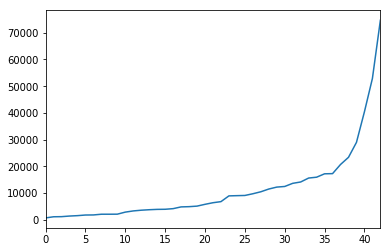

In [52]:
df_modeling['BRI GDP p.c.'].sort_values().plot(use_index=False)

In [55]:
df_modeling['GDP'] = pd.cut(df_modeling['BRI GDP p.c.'],
                            bins=[0,5000,20000,max(df_modeling['BRI GDP p.c.'])],
                            labels=['low','average','high'])
df_modeling.head()

,Country (according to CN Gov):,HF Index of Economic Freedom (Scale: 1-100),Bertelsmann Transformation index (BTI),WB UNESCO R&D Expenditure % of GDP,WB UNESCO Researchers p. mn inhabitants,TI Corruption Perception Index,BRI GDP p.c.,GDP
2,Albania,66.5,6.828571,0.15412,156.10110,36.0,3965.016806,low
5,Bahrain,66.4,4.616667,0.10116,368.90235,36.0,23395.747690,high
9,Bosnia and Herzegovina,61.9,6.282143,0.19951,463.89852,38.0,4197.807304,low
11,Bulgaria,69.0,7.800000,0.77079,2130.54538,42.0,6819.869108,average
12,Cambodia,58.7,4.000000,0.11823,30.37447,21.0,1158.689904,low


In [71]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()


#df_modeling['corruption_scaled'] = scaler.fit_transform(df_modeling[['TI Corruption Perception Index']])
df_export = df_modeling[['HF_scaled','BTI_scaled','R&D_scaled','researchers_scaled','corruption_scaled','GDP']]


In [74]:
df_export.to_csv('gdp_modeling.csv')

In [75]:
df_export

,HF_scaled,BTI_scaled,R&D_scaled,researchers_scaled,corruption_scaled,GDP
2,0.263836,0.288056,-0.905864,-0.869097,-0.570675,low
5,0.251314,-1.011212,-1.006223,-0.719452,-0.570675,high
9,-0.312177,-0.032915,-0.819850,-0.652649,-0.425043,low
11,0.576887,0.858671,0.262729,0.519359,-0.133778,average
12,-0.712882,-1.373441,-0.973876,-0.957509,-1.662917,low
14,-0.374787,1.016010,0.450846,0.332936,0.303118,average
15,1.165422,1.869835,2.198590,1.615929,1.104096,average
17,-1.489247,-1.209809,-0.049644,-0.508144,-0.643491,low
18,1.528561,1.867737,1.309169,1.530858,2.123521,average
20,1.440906,0.046803,-0.649223,-0.036768,1.031279,low


In [80]:
df_export['is_train'] = np.random.uniform(0, 1, len(df_export)) <= .75
df_export['is_train']

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


2     False
5      True
9      True
11    False
12     True
14     True
15     True
17    False
18     True
20     True
22     True
23     True
24     True
28     True
29     True
30     True
32    False
33    False
35     True
36     True
37     True
39    False
41    False
42     True
43     True
44    False
45     True
46     True
47     True
48    False
49     True
50     True
52    False
53     True
54     True
55     True
56    False
59     True
60     True
61     True
65    False
66     True
67    False
Name: is_train, dtype: bool

In [85]:
train, test = df_export[df_export['is_train']==True], df_export[df_export['is_train']==False]
train

,HF_scaled,BTI_scaled,R&D_scaled,researchers_scaled,corruption_scaled,GDP,is_train
5,0.251314,-1.011212,-1.006223,-0.719452,-0.570675,high,True
9,-0.312177,-0.032915,-0.819850,-0.652649,-0.425043,low,True
12,-0.712882,-1.373441,-0.973876,-0.957509,-1.662917,low,True
14,-0.374787,1.016010,0.450846,0.332936,0.303118,average,True
15,1.165422,1.869835,2.198590,1.615929,1.104096,average,True
18,1.528561,1.867737,1.309169,1.530858,2.123521,average,True
20,1.440906,0.046803,-0.649223,-0.036768,1.031279,low,True
22,0.076006,0.642593,1.369184,1.077338,0.157486,average,True
23,-1.151153,0.365676,-0.023171,-0.826847,-0.206595,low,True
24,0.176182,-0.051796,-0.746778,-0.827166,-0.425043,low,True


In [86]:
features = df_export.columns[0:5]
features

Index(['HF_scaled', 'BTI_scaled', 'R&D_scaled', 'researchers_scaled',
       'corruption_scaled'],
      dtype='object')

In [89]:
y_train = np.array(train['GDP'])
y_train

array(['high', 'low', 'low', 'average', 'average', 'average', 'low',
       'average', 'low', 'low', 'low', 'average', 'high', 'average',
       'low', 'average', 'low', 'low', 'low', 'low', 'average', 'average',
       'average', 'high', 'average', 'high', 'average', 'high', 'average',
       'low'], dtype=object)

In [93]:
from sklearn.metrics import classification_report

rfc = RandomForestClassifier()

rfc.fit(train[features], y_train)

y_predict = rfc.predict(test[features])
y_true = test['GDP']

print(classification_report(y_true,y_predict))

              precision    recall  f1-score   support

     average       0.75      0.60      0.67         5
        high       0.00      0.00      0.00         1
         low       0.67      0.86      0.75         7

    accuracy                           0.69        13
   macro avg       0.47      0.49      0.47        13
weighted avg       0.65      0.69      0.66        13



/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
